<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/PCA_complete_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [20]:
compound_sample_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Hitlist_non_dublicates.csv')
#print(compound_sample_df.head())
compound_sample_df = compound_sample_df.drop(columns= 'Formula (mol ion)').set_index('Unnamed: 0')
print(compound_sample_df.head())

                                                 Auto_5_gp_df  Auto_4_gp_df  \
Unnamed: 0                                                                    
4-Ethylphenylacetylene                                    0.0           0.0   
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-              0.0           0.0   
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde           0.0           0.0   
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide             0.0           0.0   
1-(2-Vinylphenyl)ethanone                                 0.0           0.0   

                                                 Auto_3_gp_df  Auto_2_gp_df  \
Unnamed: 0                                                                    
4-Ethylphenylacetylene                                    0.0           0.0   
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-              0.0           0.0   
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde           0.0           0.0   
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide      

In [14]:
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PUF_120k_blank_filtered.csv')
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PUF_120k_blank_filtered.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PUF_120k_blank_filtered.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PUF_120k_blank_filtered.csv')
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PUF_120k_blank_filtered.csv')
Zafira_2_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Zafira2_PUF_120k_blank_filtered.csv')
Zafira_1_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Zafira1_PUF_120k_blank_filtered.csv')

Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PF_120k_blank_filtered.csv')
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PF_120k_blank_filtered.csv')
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PF_120k_blank_filtered.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PF_120k_blank_filtered.csv')
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PF_120k_blank_filtered.csv')
Zafira_2_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Zafira2_PF_120k_blank_filtered.csv')
Zafira_1_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Zafira1_PF_120k_blank_filtered.csv')

U181_60k_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/U181_60k_blank_filtered.csv')
U181_120k_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/U181_120k_blank_filtered.csv')
U166_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/U166_blank_filtered.csv')
U164_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/U164_blank_filtered.csv')

In [15]:
print(U164_df.head())

   Unnamed: 0                                     Component Name  \
0           0                         2-Hexene, 3,5,5-trimethyl-   
1           1  Terephthalic acid, butyl 2,2,3,3,3-pentafluoro...   
2           2  Glutaric acid, 1,1,1-trifluoroprop-2-yl 2,4-di...   
3           3                         3-Ethyl-2-methyl-1-heptene   
4           4                            Cyclopentanol, 1-ethyl-   

  Retention Time  Reference m/z        Area   Height       TIC  \
0          4.016      57.069836  99799846.0  8287333  13869153   
1          4.237     281.051147   6582172.0   880067   1780461   
2          4.242     210.990875    542637.0    83251    171709   
3          4.303      84.088928   2701184.0   331689   1043683   
4          4.316      67.054253  14862042.0  2393273   5119395   

  Formula (mol ion)     CAS No.     SI  ...  Selected Column Type  \
0             C9H18  26456-76-8  749.0  ...      StandardNonPolar   
1        C15H15F5O4           0  616.0  ...      Standar

In [16]:
dfs = [('Auto_5_gp_df', Auto_5_gp_df), ('Auto_4_gp_df', Auto_4_gp_df),
       ('Auto_3_gp_df', Auto_3_gp_df), ('Auto_2_gp_df', Auto_2_gp_df),
       ('Auto_1_gp_df', Auto_1_gp_df), ('Zafira_2_gp_df', Zafira_2_gp_df),
       ('Zafira_1_gp_df', Zafira_1_gp_df), ('Auto_5_pm_df', Auto_5_pm_df),
       ('Auto_4_pm_df', Auto_4_pm_df), ('Auto_3_pm_df', Auto_3_pm_df),
       ('Auto_2_pm_df', Auto_2_pm_df), ('Auto_1_pm_df', Auto_1_pm_df),
       ('Zafira_2_pm_df', Zafira_2_pm_df), ('Zafira_1_pm_df', Zafira_1_pm_df),
       ('U181_60k_df', U181_60k_df), ('U181_120k_df', U181_120k_df),
       ('U166_df', U166_df), ('U164_df', U164_df)]

# Create a list of all unique compounds
all_compounds = []
for _, df in dfs:
    all_compounds.extend(df['Component Name'].unique())

# Remove duplicates and create an empty dataframe with all compounds and samples
all_compounds = list(set(all_compounds))
compound_sample_df = pd.DataFrame(index=all_compounds)

# Fill the dataframe with area ratios
for df_name, df in dfs:
    for compound in all_compounds:
        # Check if the compound is in the current dataframe
        if compound in df['Component Name'].values:
            # Get the area ratio for the compound in the current sample
            area_ratio = df.loc[df['Component Name'] == compound, 'Area Ratio'].values[0]
            compound_sample_df.loc[compound, df_name] = area_ratio
        else:
            # If compound is not in the current sample, set the value to 0
            compound_sample_df.loc[compound, df_name] = 0

# Display the resulting dataframe
print(compound_sample_df)

                                                    Auto_5_gp_df  \
Alanine, N-methyl-n-butoxycarbonyl-, hexadecyl ...      0.000000   
1,2-Benzenediol, O-(4-ethylbenzoyl)-O'-(2-trifl...      0.006961   
Benzaldehyde, 4-(1-phenyl-2-propenyloxy)-               0.000000   
Dipentyl methylphosphonate                              0.000000   
Oxalic acid, isohexyl propyl ester                      0.000000   
...                                                          ...   
6-Fluoro[1,2,4]triazolo[1,5-a]pyridin-2-ylamine...      0.000000   
Trifluoromethyl t-butyl disulfide                       0.000000   
Manganese(1+), dicarbonyl[(1,2,3,4,5-.eta.)-1-m...      0.000000   
1,1'-Biphenyl, 4-ethenyl-                               0.000000   
Pipecolic acid, N-propargyloxycarbonyl-, tridec...      0.000000   

                                                    Auto_4_gp_df  \
Alanine, N-methyl-n-butoxycarbonyl-, hexadecyl ...      0.000000   
1,2-Benzenediol, O-(4-ethylbenzoyl)-O'-(2-trifl

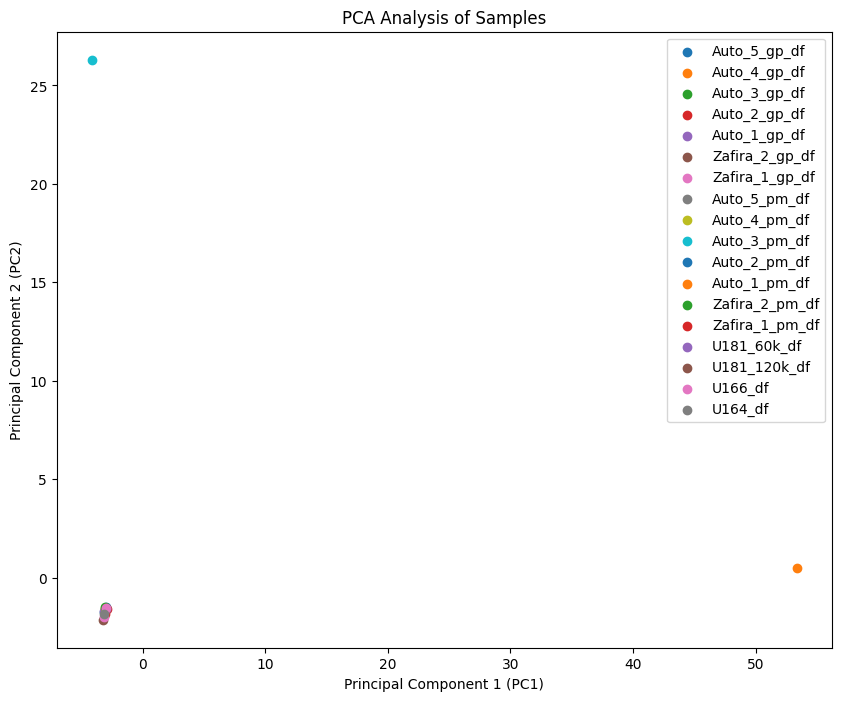

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)  # Transpose the dataframe to have samples as rows

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for sample in pca_df.index:
    plt.scatter(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], label=sample)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

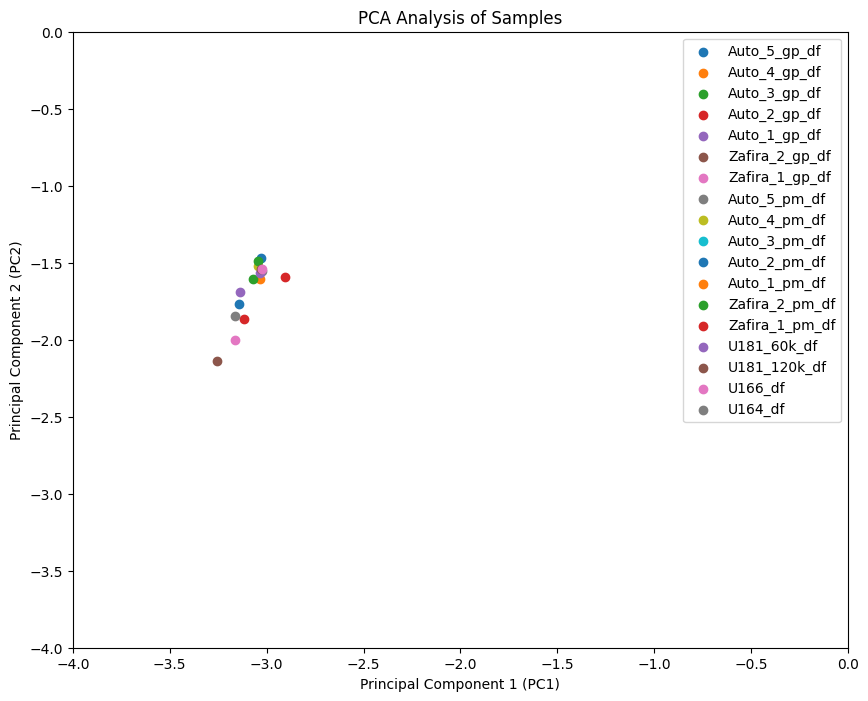

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)  # Transpose the dataframe to have samples as rows

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for sample in pca_df.index:
    plt.scatter(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], label=sample)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.show()

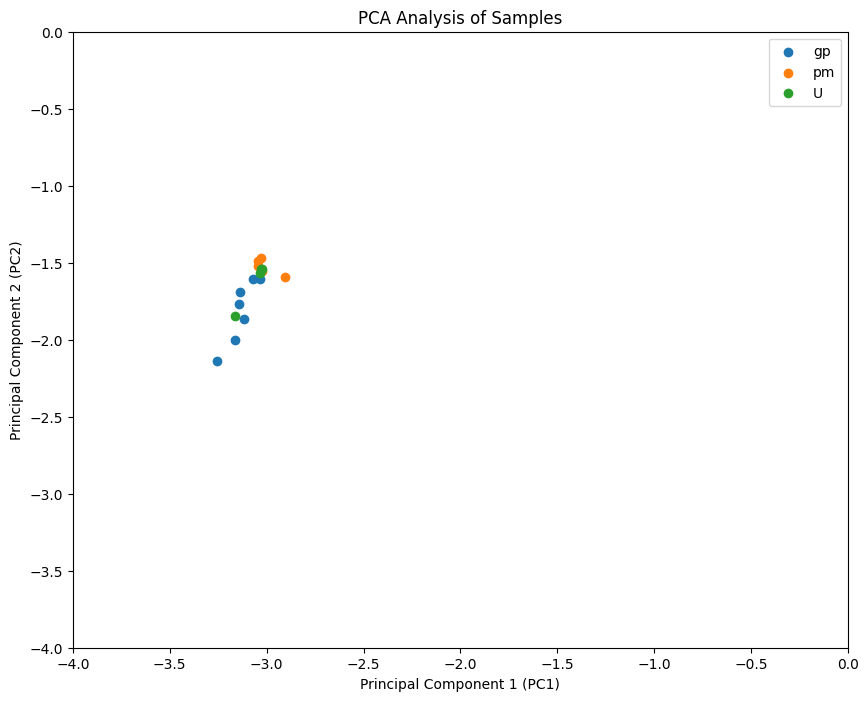

In [23]:
sample_classes = ['gp' if 'gp' in sample else 'pm' if 'pm' in sample else 'U' for sample in compound_sample_df.columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)
pca_df['Sample Class'] = sample_classes  # Add a column for sample classes

# Plot the PCA results with different colors for sample classes
plt.figure(figsize=(10, 8))
for sample_class in pca_df['Sample Class'].unique():
    subset = pca_df[pca_df['Sample Class'] == sample_class]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample_class)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.xlim(-4, 0)
plt.ylim(-4, 0)
plt.show()

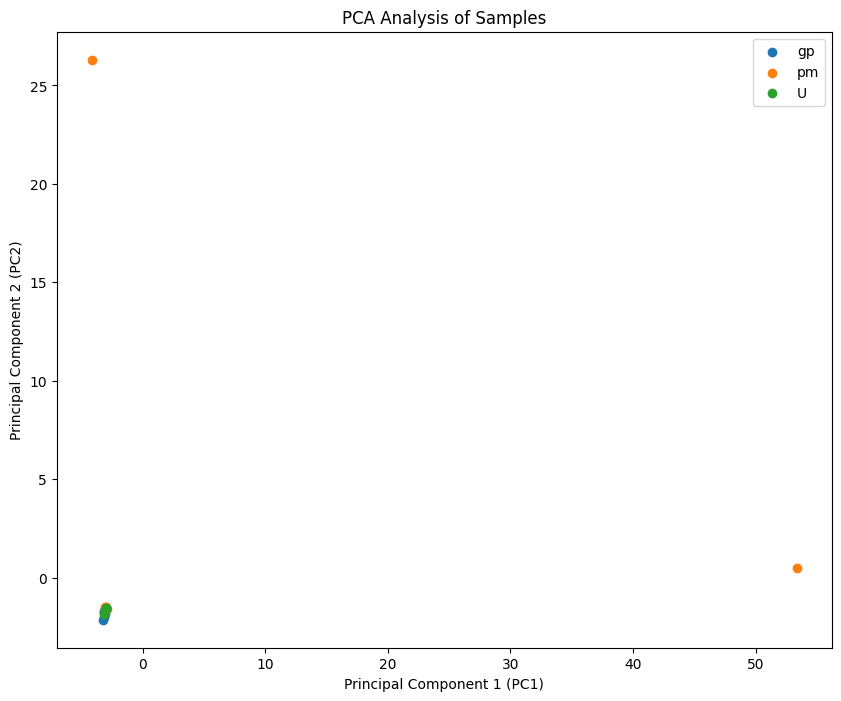

In [24]:
sample_classes = ['gp' if 'gp' in sample else 'pm' if 'pm' in sample else 'U' for sample in compound_sample_df.columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)
pca_df['Sample Class'] = sample_classes  # Add a column for sample classes

# Plot the PCA results with different colors for sample classes
plt.figure(figsize=(10, 8))
for sample_class in pca_df['Sample Class'].unique():
    subset = pca_df[pca_df['Sample Class'] == sample_class]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample_class)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

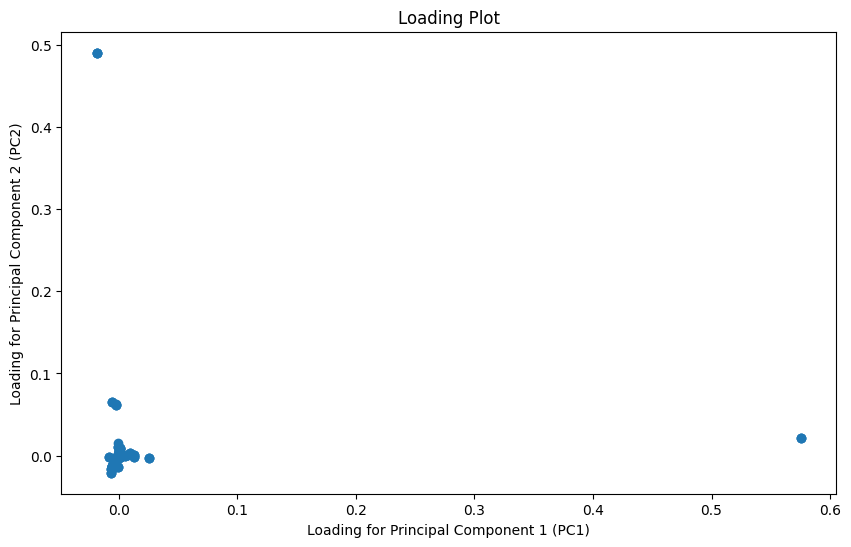

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')
plt.show()

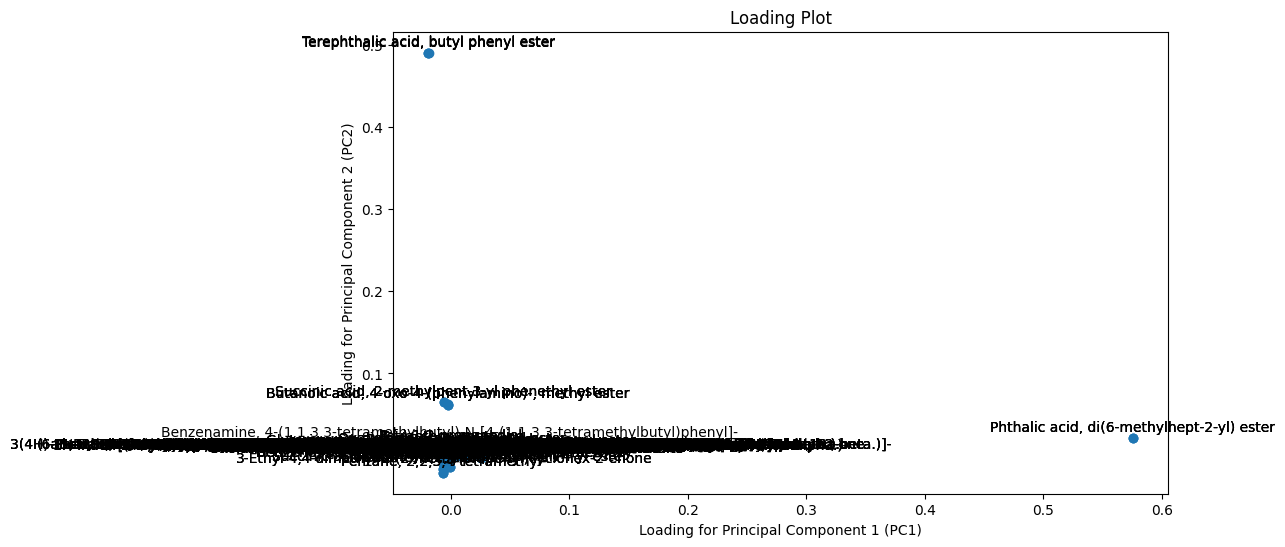

In [26]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')

# Annotate points with variable names for better interpretation
for variable, (x, y) in loadings_df.iterrows():
    plt.annotate(variable, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

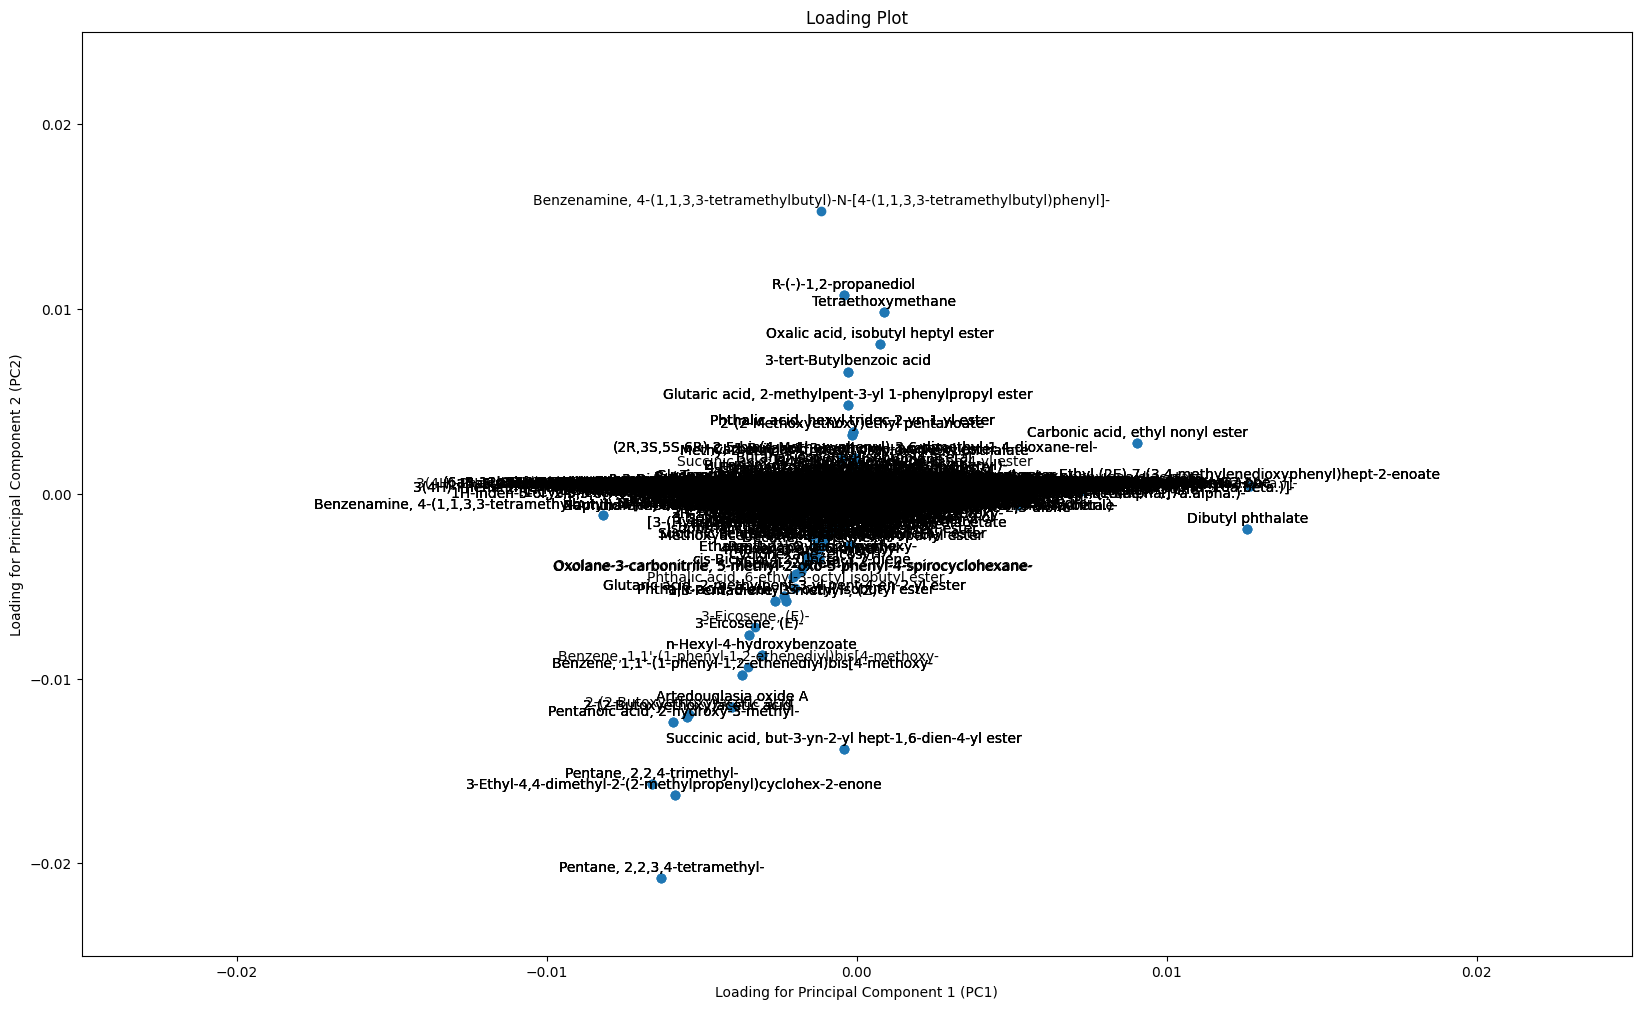

In [27]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(20, 12))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')

# Annotate points with variable names for better interpretation
for variable, (x, y) in loadings_df.iterrows():
    plt.annotate(variable, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlim(-0.025, 0.025)  # Set x-axis limits from 1 to 5
plt.ylim(-0.025, 0.025)  # Set y-axis limits from 0 to 12

plt.show()


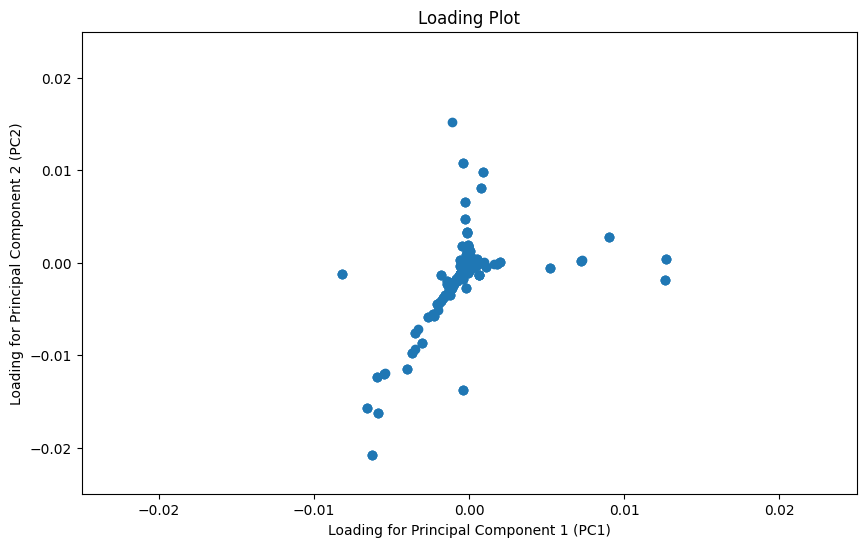

In [28]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025)
plt.show()

<ipython-input-29-9da90ac2c259>:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_10_loadings = loadings_df.loc[top_10_variables]
<ipython-input-29-9da90ac2c259>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


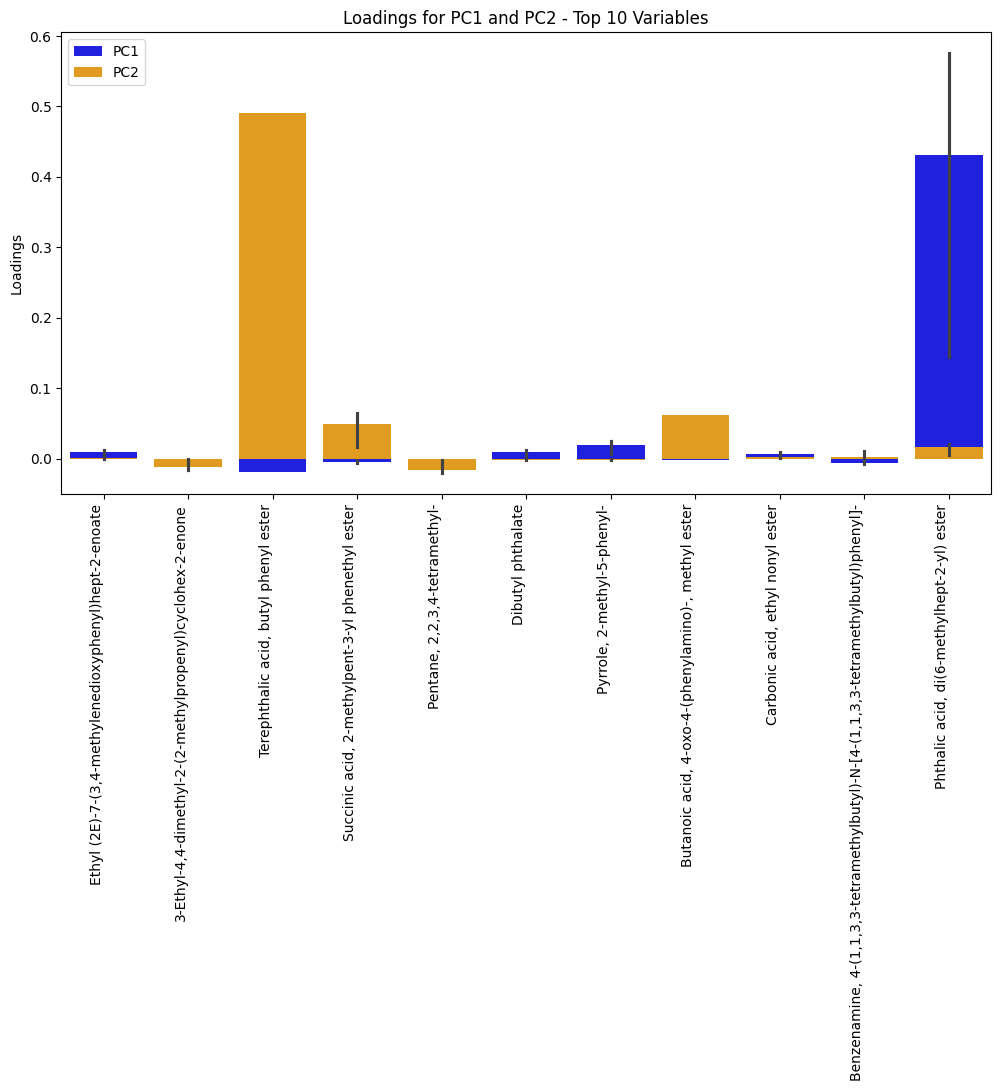

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Get the top 10 most important variables for PC1 and PC2
top_10_pc1 = loadings_df['PC1'].abs().nlargest(20)
top_10_pc2 = loadings_df['PC2'].abs().nlargest(20)

# Combine the top 10 variables for both PCs
top_10_variables = set(top_10_pc1.index) | set(top_10_pc2.index)

# Filter the loadings dataframe for the top 10 variables
top_10_loadings = loadings_df.loc[top_10_variables]

# Plot the bar plot inspired by the provided code
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC1'], color='blue', label='PC1', ax=ax)
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC2'], color='orange', label='PC2', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Loadings')
ax.set_title('Loadings for PC1 and PC2 - Top 10 Variables')
ax.legend()
plt.show()

In [30]:
print(pca_result)

[[-3.14463812 -1.76863293]
 [-3.03506492 -1.60452359]
 [-3.07302825 -1.6051175 ]
 [-3.11673184 -1.86222719]
 [-3.13838569 -1.68850905]
 [-3.25610512 -2.13687617]
 [-3.16158613 -2.00326848]
 [-3.02643579 -1.5541749 ]
 [-3.04581653 -1.52063061]
 [-4.12757719 26.30746392]
 [-3.03090196 -1.46889762]
 [53.35969452  0.48614456]
 [-3.04425596 -1.49065197]
 [-2.90490994 -1.59571285]
 [-3.03465802 -1.56858502]
 [-3.03097144 -1.54148717]
 [-3.02272655 -1.54019454]
 [-3.16590109 -1.8441189 ]]


In [31]:
print(loadings_df)

                                                             PC1           PC2
Unnamed: 0                                                                    
4-Ethylphenylacetylene                             -1.294570e-05 -3.353200e-05
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-       -3.071791e-07 -6.148743e-07
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde    -7.505123e-08 -1.585827e-07
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide      -5.741913e-08 -1.196005e-07
1-(2-Vinylphenyl)ethanone                          -1.546503e-06 -3.682494e-06
...                                                          ...           ...
1,2-Propanedione, 1-phenyl-                        -1.913812e-05 -4.101583e-05
2H-1-Benzopyran-2-one, 3,4-dihydro-6-hydroxy-      -6.305557e-04 -1.657435e-03
2-Propyn-1-amine, N,N-di-2-propynyl-               -9.714151e-06 -2.514414e-05
1,2,5-Oxadiazol-3-amine, 4-(phenylmethoxy)-        -1.168366e-05 -2.750229e-05
3-Pyridinecarboxylic acid, 5-ethenyl-, methyl e... -